In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import csv file etude_remunveration_2022.csv
df = pd.read_csv('etude_remuneration_2022.csv', sep=';', header=2)

In [4]:
# display the first 5 rows of the dataframe
df.head()

,Séquentiel,SID,Heure de soumission,Heure de complétion,Heure de modification,Brouillon,Adresse IP,UID,Nom d'utilisateur,De quelle école êtes-vous diplômé-e?,...,Années d'ancienneté,Etes-vous satisfait-e de votre emploi ?,Quel est votre revenu ANNUEL NET imposable en 2022 ?,"Revenu salarial annuel net imposable : somme de tous les salaires perçus par un individu au cours d'une année donnée, nets de toutes cotisations sociales, y compris contribution sociale généralisée (CSG) et contribution au remboursement de la dette sociale (CRDS).","Revenu d’activité annuel : rémunération issue de l’activité non salariée, déduction faite des cotisations sociales payées dans l’année mais pas des contributions sociales (CSG non déductible, CRDS). Il est calculé à partir du revenu professionnel imposable auquel sont réintégrés certains allègements fiscaux et cotisations sociales facultatives : chiffre d’affaires des micro-entrepreneurs après abattement pour frais professionnels, bénéfice net des entrepreneurs individuels classiques, rémunération des gérants majoritaires (incluant une partie des dividendes).",Quel est votre salaire ANNUEL NET imposable en 2022 ?,Quel est votre revenu d’activité ANNUEL en 2022 ?,Quels sont vos avantages ?,Etes-vous satisfait-e de votre rémunération ?,Pensez-vous que la loi MOP permet une juste rémunération des paysagistes ?
0,1,14514435,03/01/2023 - 12:18,03/01/2023 - 12:18,03/01/2023 - 12:18,0,0.0.0.0,0,Anonymous,Agrocampus Ouest (INH),...,1,3,NaN,X,NaN,27700.0,NaN,tickets restaurants 10€,3,1
1,2,14514470,03/01/2023 - 12:20,03/01/2023 - 12:20,03/01/2023 - 12:20,0,0.0.0.0,0,Anonymous,Agrocampus Ouest (INH),...,5,4,40816.0,X,NaN,40816.0,NaN,Ticket restaurant + voiture de fonction,4,1
2,3,14514608,03/01/2023 - 12:28,03/01/2023 - 12:28,03/01/2023 - 12:28,0,0.0.0.0,0,Anonymous,HEPIA de Genève,...,12,5 - Très satisfait,38000.0,X,NaN,38000.0,NaN,NaN,3,1
3,4,14514637,03/01/2023 - 12:29,03/01/2023 - 12:29,03/01/2023 - 12:29,0,0.0.0.0,0,Anonymous,ENSP Versailles,...,6,4,14574.0,X,NaN,14574.0,NaN,"Remboursement de notes de frais, frais de comp...",3,1
4,5,14514655,03/01/2023 - 12:30,03/01/2023 - 12:30,03/01/2023 - 12:30,0,0.0.0.0,0,Anonymous,HEPIA de Genève,...,12,5 - Très satisfait,38000.0,X,NaN,38000.0,NaN,NaN,3,1


In [5]:
# describe pandas dataframe
df.columns

Index(['Séquentiel', 'SID', 'Heure de soumission', 'Heure de complétion',
       'Heure de modification', 'Brouillon', 'Adresse IP', 'UID',
       'Nom d'utilisateur', 'De quelle école êtes-vous diplômé-e?',
       'Autre diplôme', 'En quelle année avez-vous été diplômé-e ?',
       'Combien d'années d'expérience avez-vous ?',
       'Quelle est votre région actuelle ?', 'Autre localisation',
       'Quel est votre sexe ?', 'Combien d'enfants à charge avez-vous ?',
       'Dans quel type de structure êtes-vous ?',
       'Précision concernant le type de structure',
       'Quelle est la taille de cette structure ?',
       'De quelle convention collective dépend cette structure ?',
       'activités d’enseignement', 'activités associatives',
       'activités de paysagiste conseils de l’état',
       'responsabilités universitaire',
       'activité non salariée, en tant que micro-entrepreneurs',
       'activité non salariée, en tant qu’entrepreneurs individuels classiques',
       'a

In [6]:
df['Etes-vous favorable au télétravail ?'].value_counts(normalize=True)

Etes-vous favorable au télétravail ?
Oui, si flexbile                                      0.772059
Oui, y compris à temps complet                        0.102941
Non, exceptionnellement pour les deux confinements    0.073529
Non, pas du tout                                      0.044118
Non, uniquement pour le premier confinement           0.007353
Name: proportion, dtype: float64

In [7]:
df[['Combien d\'enfants à charge avez-vous ?']].value_counts(normalize=True)



Combien d'enfants à charge avez-vous ?
0                                         0.676471
1                                         0.154412
2                                         0.139706
3                                         0.022059
4                                         0.007353
Name: proportion, dtype: float64

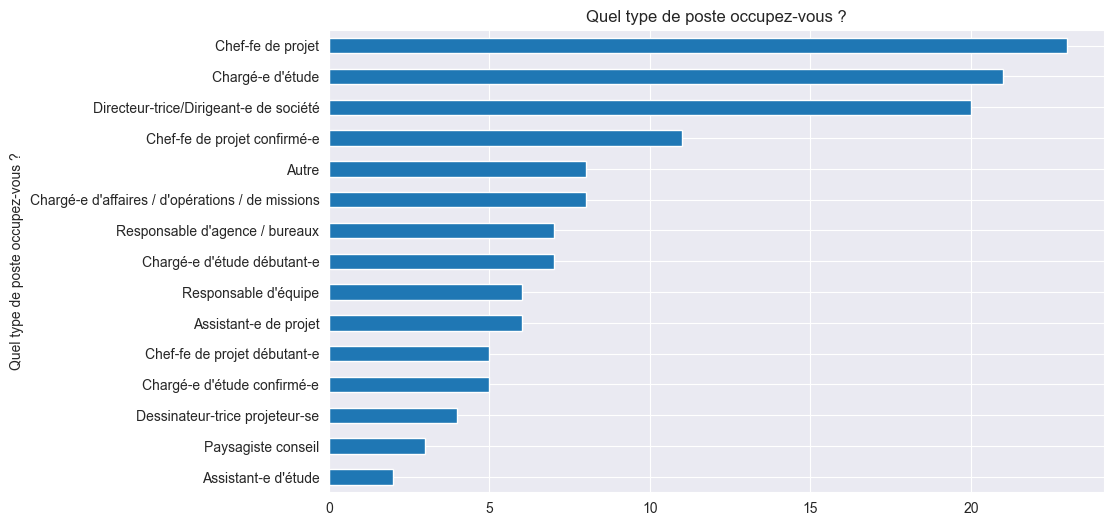

In [8]:
%matplotlib inline
graph = df['Quel type de poste occupez-vous ?'].value_counts().sort_values().plot(kind='barh', figsize=(10, 6))
graph.set_title('Quel type de poste occupez-vous ?')

plt.show()

In [9]:
df["Nombre d'années depuis diplôme"] = 2022-df["En quelle année avez-vous été diplômé-e ?"]

# create column with 3 buckets of experience
df['Experience'] = pd.cut(df["Nombre d'années depuis diplôme"], bins=[0, 3, 6, 10, 100], labels=['0-3', '4-6', '7-10', '11+'])

In [10]:
df['Experience'].value_counts(normalize=True)

Experience
11+     0.330827
4-6     0.300752
0-3     0.248120
7-10    0.120301
Name: proportion, dtype: float64

In [11]:
from ydata_profiling import ProfileReport

report = ProfileReport(df, title="distributions", minimal=True)
report.to_file("distributions.html")

/Users/thomaspocreau/Library/Caches/pypoetry/virtualenvs/etude-salariale-kB-OaZVJ-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 174.25it/s]


<Axes: xlabel='Quel est votre salaire ANNUEL NET imposable en 2022 ?', ylabel='Quel type de poste occupez-vous ?'>

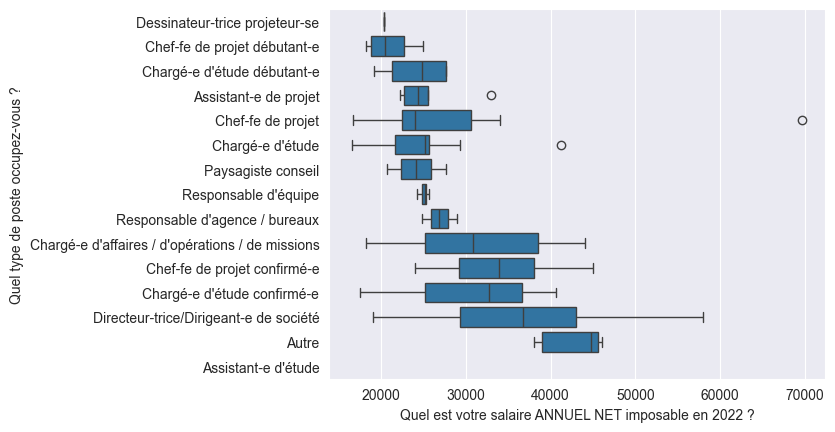

In [12]:
# create a boxplot of the distribution of "Nombre d'années depuis diplôme" according to the "Quel type de poste occupez-vous ?" column 
# sort the boxplot by the median value of "Nombre d'années depuis diplôme"
# filter value lower than 10000 and higher than 250000


sns.boxplot(data=df[(df["Quel est votre salaire ANNUEL NET imposable en 2022 ?"] > 15000) & (df["Quel est votre salaire ANNUEL NET imposable en 2022 ?"] < 250000)], x="Quel est votre salaire ANNUEL NET imposable en 2022 ?", y="Quel type de poste occupez-vous ?", order=df.groupby("Quel type de poste occupez-vous ?")["Quel est votre salaire ANNUEL NET imposable en 2022 ?"].median().sort_values().index)


In [13]:
# count values of convention collectives
df['De quelle convention collective dépend cette structure ?'].value_counts(normalize=True)

De quelle convention collective dépend cette structure ?
Convention collective nationale des entreprises d'architecture                                                                                  0.294118
Syntec: Convention collective nationale des bureaux d'études techniques, des cabinets d'ingénieurs-conseils et des sociétés de conseils         0.183824
Je ne sais pas                                                                                                                                  0.147059
Fonction publique territoriale                                                                                                                  0.125000
Convention collective nationale des entreprises du paysage                                                                                      0.095588
Code du travail (Sans convention)                                                                                                               0.073529
Convention collective des

In [55]:
# filter to keep only "Quel type de poste occupez-vous ?" containing "chef"
df_chef = df[df['Quel type de poste occupez-vous ?'].str.contains('chef', case=False) & (df["Quel est votre salaire ANNUEL NET imposable en 2022 ?"] < 250000) & (df["Quel est votre salaire ANNUEL NET imposable en 2022 ?"] > 15000)]

df_chef.count()

Séquentiel                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               28
SID                                                                                                                                                                                                                                                                                                                                                                                                                                         

<Axes: xlabel='Quel est votre salaire ANNUEL NET imposable en 2022 ?', ylabel='Quel type de poste occupez-vous ?'>

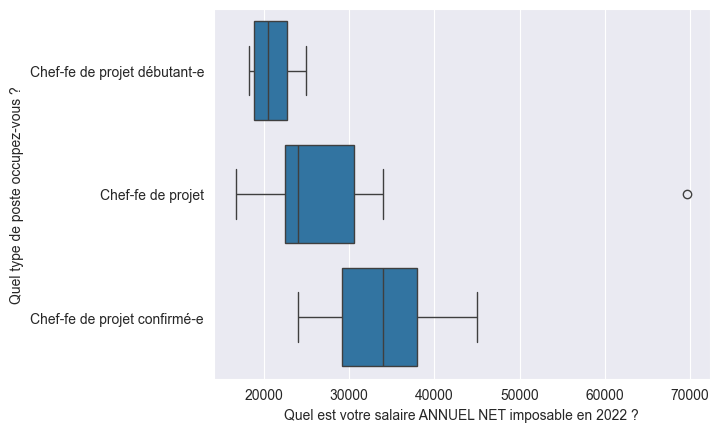

In [39]:
sns.boxplot(data=df_chef, x="Quel est votre salaire ANNUEL NET imposable en 2022 ?", y="Quel type de poste occupez-vous ?", order=df_chef.groupby("Quel type de poste occupez-vous ?")["Quel est votre salaire ANNUEL NET imposable en 2022 ?"].median().sort_values().index)

<Axes: xlabel='Quel est votre salaire ANNUEL NET imposable en 2022 ?', ylabel='Etes-vous satisfait-e de votre rémunération ?'>

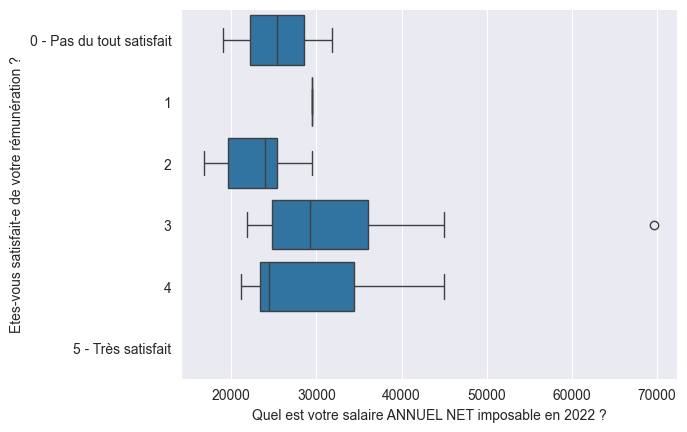

In [41]:
sns.boxplot(data=df_chef, x="Quel est votre salaire ANNUEL NET imposable en 2022 ?", y='Etes-vous satisfait-e de votre rémunération ?', order=['0 - Pas du tout satisfait', '1', '2', '3', '4', '5 - Très satisfait'])

<Axes: xlabel='Quel est votre temps de travail hebdomadaire effectif annualisé ?', ylabel='Etes-vous satisfait-e de votre charge horaire ?'>

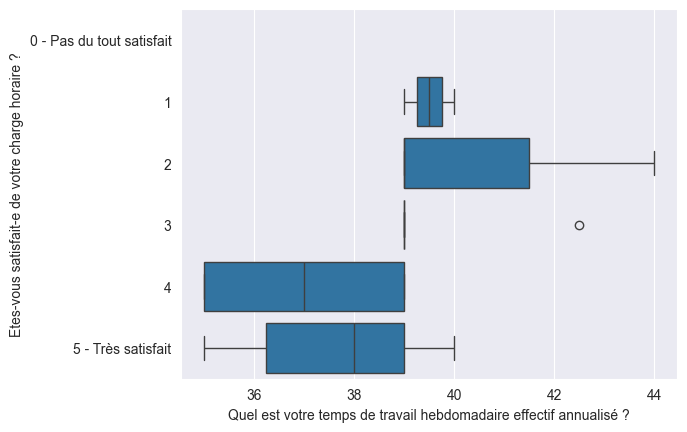

In [48]:
# sort by alphabetical order of 'Etes-vous satisfait-e de votre charge horaire ?'
sns.boxplot(data=df_chef, x='Quel est votre temps de travail hebdomadaire effectif annualisé ?',
            y='Etes-vous satisfait-e de votre charge horaire ?', order=['0 - Pas du tout satisfait', '1', '2', '3', '4', '5 - Très satisfait'])

/var/folders/_7/j7zw29zx1fz0xlx8ctxsx_v00000gp/T/ipykernel_13584/1635608873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chef['Quelle est votre région actuelle ?'] = df_chef['Quelle est votre région actuelle ?'].replace('Paris', 'Île-de-France')
/var/folders/_7/j7zw29zx1fz0xlx8ctxsx_v00000gp/T/ipykernel_13584/1635608873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chef['Quelle est votre région actuelle ?'] = df_chef['Quelle est votre région actuelle ?'].apply(lambda x: 'Province' if x !=

<Axes: xlabel='Quel est votre salaire ANNUEL NET imposable en 2022 ?', ylabel='Quelle est votre région actuelle ?'>

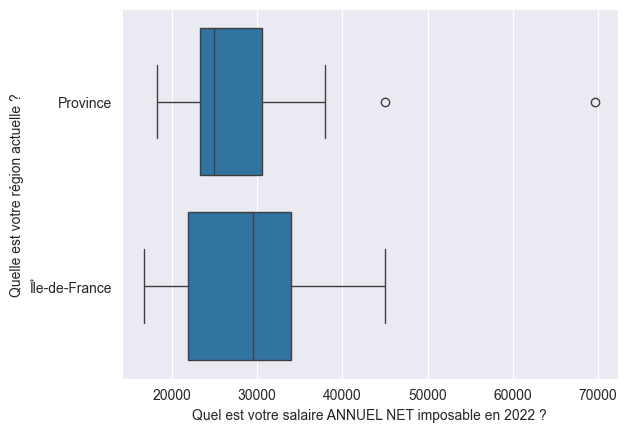

In [57]:
# and group by 'Quelle est votre région actuelle ?' Paris and Ile-de-France should be in a same group
df_chef['Quelle est votre région actuelle ?'] = df_chef['Quelle est votre région actuelle ?'].replace('Paris', 'Île-de-France')

# group all regions that are not 'Île-de-France' in a same group called 'Province'
df_chef['Quelle est votre région actuelle ?'] = df_chef['Quelle est votre région actuelle ?'].apply(lambda x: 'Province' if x != 'Île-de-France' else x)

# sort by alphabetical order of 'Etes-vous satisfait-e de votre charge horaire ?'
sns.boxplot(data=df_chef, x="Quel est votre salaire ANNUEL NET imposable en 2022 ?",
            y='Quelle est votre région actuelle ?')